In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'price')

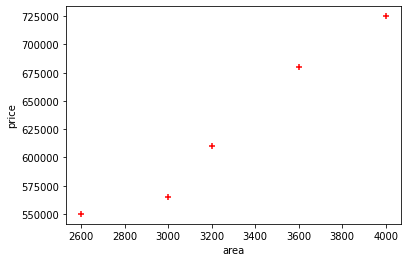

In [4]:
%matplotlib inline
plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel('area')
plt.ylabel('price')

In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df[['price']])

LinearRegression()

In [6]:
reg.coef_

array([[135.78767123]])

In [7]:
reg.intercept_

array([180616.43835616])

In [8]:
# y=m*x+b
135.78767123*3300+180616.43835616432

628715.7534151643

In [10]:
reg.predict([[5000]])

array([[859554.79452055]])

In [11]:
import pickle

In [13]:
with open('model_pickle', 'wb')as f:
    pickle.dump(reg,f)

In [15]:
with open('model_pickle', 'rb')as f:
    mp = pickle.load(f)

In [17]:
mp.predict([[5000]])

array([[859554.79452055]])

In [19]:
import joblib

In [20]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [21]:
mj = joblib.load('model_joblib')

In [22]:
mj.predict([[5000]])

array([[859554.79452055]])

In [24]:
mj.coef_

array([[135.78767123]])

In [25]:
d=pd.read_csv("areas.csv")
d.head(3)

,area
0,1000
1,1500
2,2300


In [26]:
p=reg.predict(d)

In [89]:
d['prices']=p

In [90]:
d.to_csv("prediction.csv")


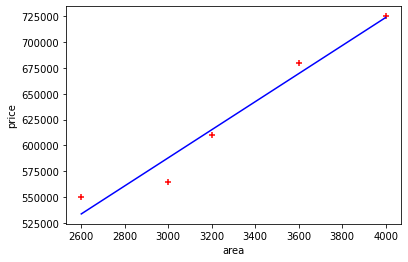

In [91]:
%matplotlib inline
plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel('area')
plt.ylabel('price')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

In [92]:
df1=pd.read_csv('canada_per_capita_income.csv')

In [93]:
df1.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [94]:
df1.rename(columns={'year':"Years","per capita income (US$)":"P.C.I. $"} ,inplace=True)

In [95]:
df1.head()

,Years,P.C.I. $
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'price')

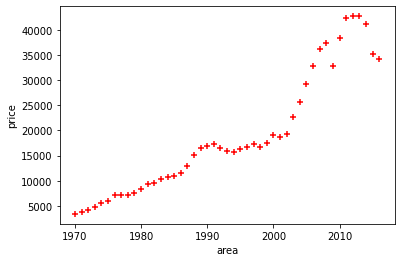

In [96]:
%matplotlib inline
plt.scatter(df1.Years, df1['P.C.I. $'], color='red', marker='+')
plt.xlabel('area')
plt.ylabel('price')

In [97]:
reg = linear_model.LinearRegression()
reg.fit(df1[['Years']], df1[['P.C.I. $']])

LinearRegression()

In [98]:
reg.predict([[2000]])

array([[24719.39258996]])

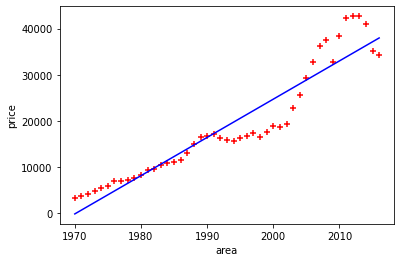

In [99]:
%matplotlib inline
plt.scatter(df1.Years, df1[['P.C.I. $']], color='red', marker='+')
plt.xlabel('area')
plt.ylabel('price')
plt.plot(df1.Years, reg.predict(df1[['Years']]), color='blue')

In [100]:
## MULTIPLE REGRESSION

In [4]:
df2 = pd.read_csv('homeprices1.csv')
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [8]:
import math
median_bedrooms = math.floor(df2.bedrooms.median())
median_bedrooms

4

In [12]:
df2.bedrooms = df2.bedrooms.fillna(median_bedrooms)
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [16]:
reg = linear_model.LinearRegression()
reg.fit(df2[['area', 'bedrooms', 'age']], df2.price)
## df2([['independent variables']],target variables)

LinearRegression()

In [18]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [19]:
reg.intercept_

221323.00186540443

In [22]:
reg.predict([[3000,4,15]])

array([602590.07937407])

In [24]:
# price = m1*area + m2*bedrooms + m3*age + b 
# price->dependent variable
# area, bedroom, age -> independent variable(features)

In [25]:
112.06244194*3000 + 23388.88007794*4 + -3231.71790863*15 + 221323.00186540443

602590.0793677145

In [26]:
reg.predict([[2500,4,5]])

array([578876.03748933])